In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
ages = df['age']
smoking_factor = pd.Categorical(df['smoker'])
sample_list = [ages[:5].tolist(), df['smoker'][:5].tolist()]
matrix = np.array(df[['age', 'expenses']].head())
data_frame = df[['age', 'smoker', 'expenses']].head()
print("\nSample Vector (ages):")
print(ages[:5])
print("\nSample Factor (smoking_factor):")
print(smoking_factor[:5])
print("\nSample List:")
print(sample_list)
print("\nSample Matrix:")
print(matrix)
print("\nSample Data Frame:")
print(data_frame)


Sample Vector (ages):
0    19
1    18
2    28
3    33
4    32
Name: age, dtype: int64

Sample Factor (smoking_factor):
['yes', 'no', 'no', 'no', 'no']
Categories (2, object): ['no', 'yes']

Sample List:
[[19, 18, 28, 33, 32], ['yes', 'no', 'no', 'no', 'no']]

Sample Matrix:
[[1.900000e+01 1.688492e+04]
 [1.800000e+01 1.725550e+03]
 [2.800000e+01 4.449460e+03]
 [3.300000e+01 2.198447e+04]
 [3.200000e+01 3.866860e+03]]

Sample Data Frame:
   age smoker  expenses
0   19    yes  16884.92
1   18     no   1725.55
2   28     no   4449.46
3   33     no  21984.47
4   32     no   3866.86


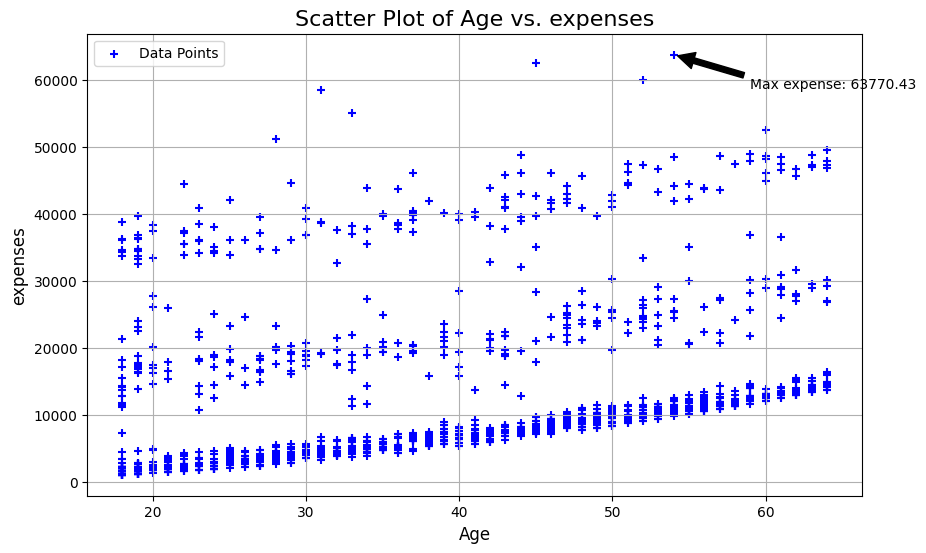

In [ ]:
# Scatter plot between age and charges
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['expenses'], marker='+', color='blue', label='Data Points')
plt.title('Scatter Plot of Age vs. expenses', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('expenses', fontsize=12)

# Text annotation for the maximum charge
max_charge_index = df['expenses'].idxmax()
plt.annotate(f'Max expense: {df["expenses"][max_charge_index]:.2f}',
             xy=(df['age'][max_charge_index], df['expenses'][max_charge_index]),
             xytext=(df['age'][max_charge_index] + 5, df['expenses'][max_charge_index] - 5000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend()

plt.grid(True)
plt.show()

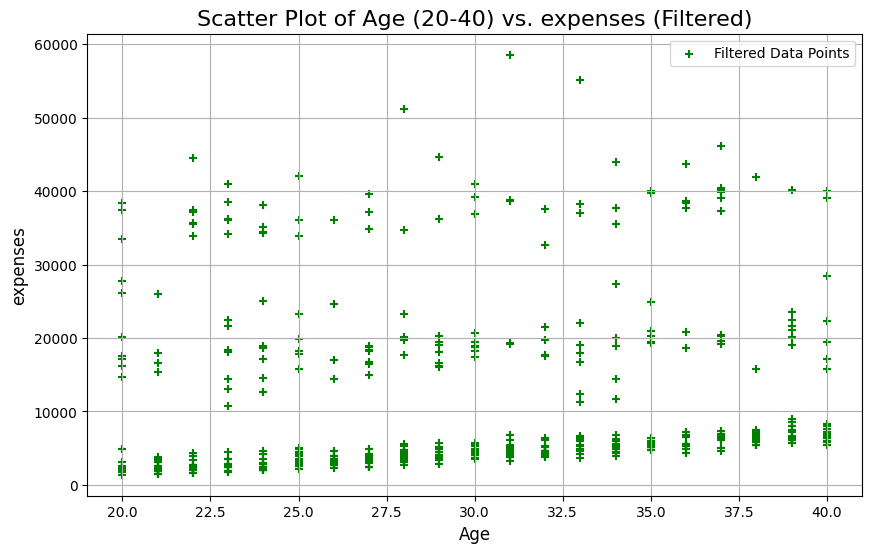

In [ ]:
# Filter data for ages between 20 and 40
filtered_df = df[(df['age'] >= 20) & (df['age'] <= 40)]

# Update the plot with the filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['age'], filtered_df['expenses'], marker='+', color='green', label='Filtered Data Points')
plt.title('Scatter Plot of Age (20-40) vs. expenses (Filtered)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('expenses', fontsize=12)
plt.legend()

plt.grid(True)
plt.show()

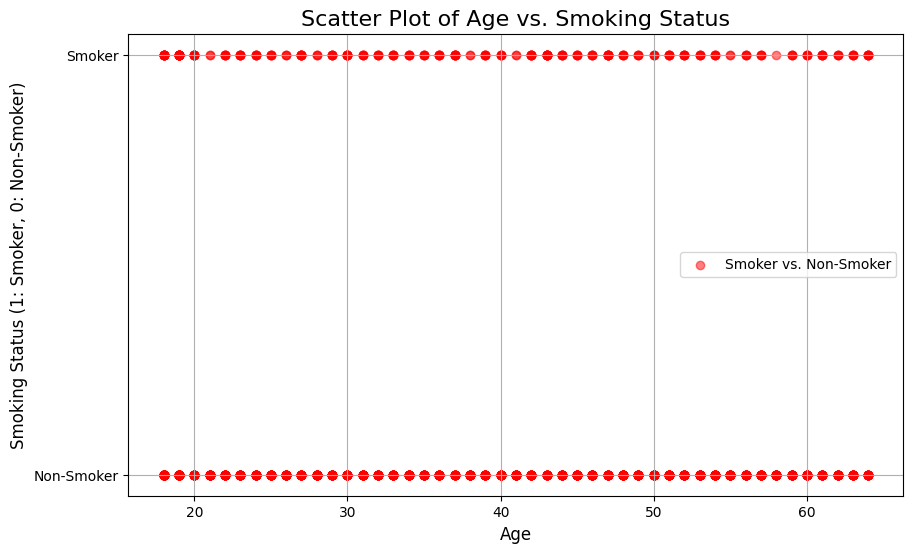

In [ ]:
# Plot a scatter plot between age and smoking
# First, we'll convert the 'smoker' column to numerical values
df['smoker_num'] = df['smoker'].map({'yes': 1, 'no': 0})

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['smoker_num'], color='red', alpha=0.5, label='Smoker vs. Non-Smoker')
plt.title('Scatter Plot of Age vs. Smoking Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Smoking Status (1: Smoker, 0: Non-Smoker)', fontsize=12)
plt.yticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.legend()
plt.grid(True)
plt.show()

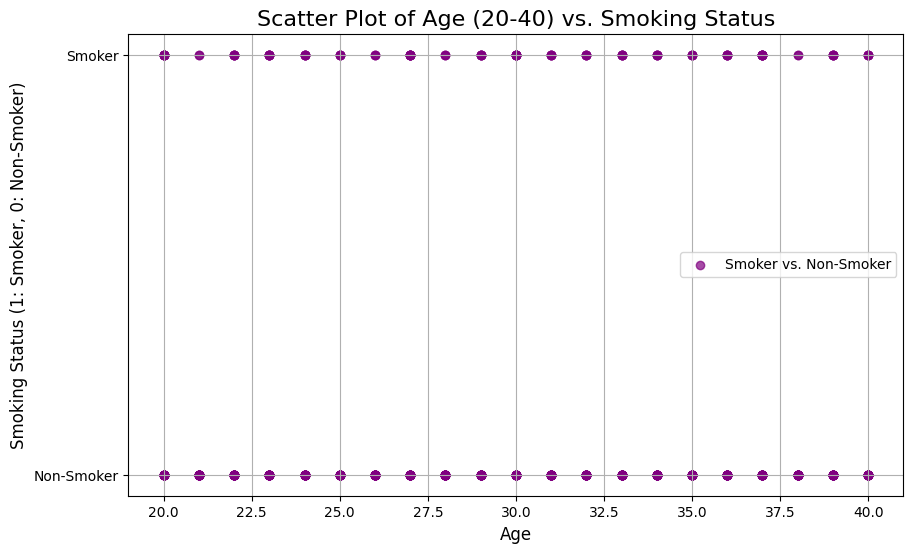

In [ ]:
# Plot a scatter plot between age (20 to 40) and smoking
filtered_df_age = df[(df['age'] >= 20) & (df['age'] <= 40)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_age['age'], filtered_df_age['smoker_num'], color='purple', alpha=0.7, label='Smoker vs. Non-Smoker')
plt.title('Scatter Plot of Age (20-40) vs. Smoking Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Smoking Status (1: Smoker, 0: Non-Smoker)', fontsize=12)
plt.yticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.legend()
plt.grid(True)
plt.show()

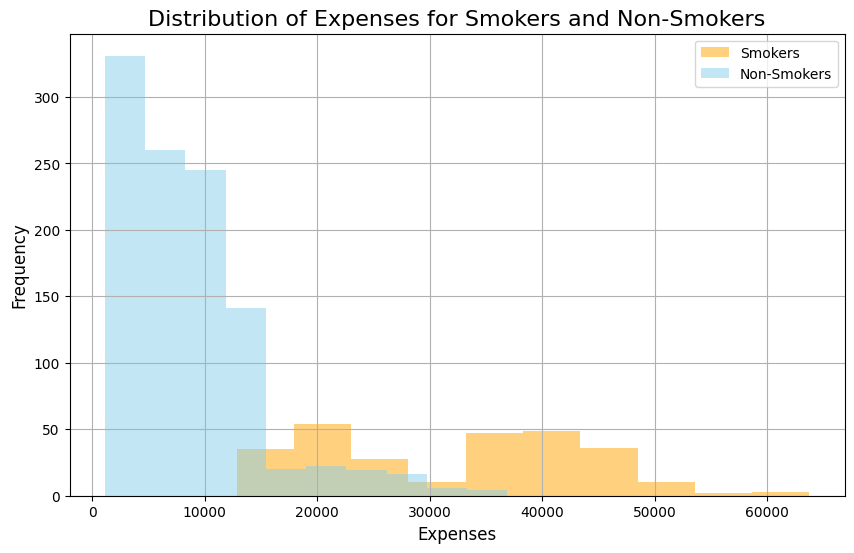

In [ ]:
# Find expenses of smokers and non-smokers (plot)
smoker_expenses = df[df['smoker'] == 'yes']['expenses']
non_smoker_expenses = df[df['smoker'] == 'no']['expenses']

plt.figure(figsize=(10, 6))
plt.hist(smoker_expenses, alpha=0.5, label='Smokers', color='orange')
plt.hist(non_smoker_expenses, alpha=0.5, label='Non-Smokers', color='skyblue')
plt.title('Distribution of Expenses for Smokers and Non-Smokers', fontsize=16)
plt.xlabel('Expenses', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


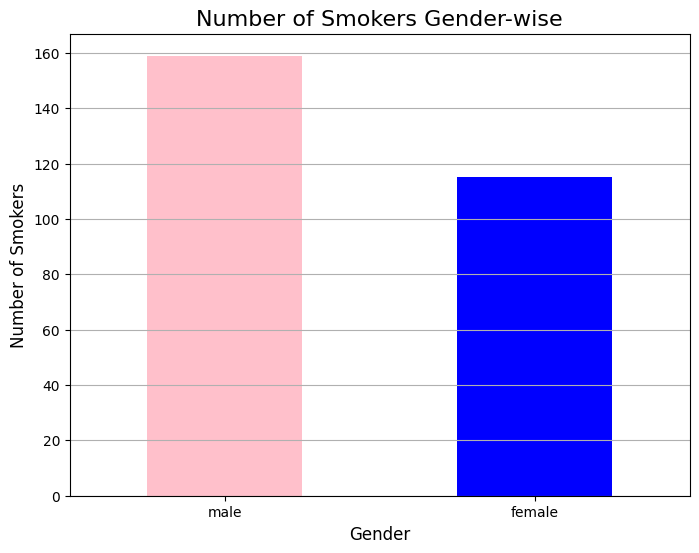

In [ ]:
# Find the number of smokers gender-wise (plot)
smokers_gender = df[df['smoker'] == 'yes']['sex'].value_counts()

plt.figure(figsize=(8, 6))
smokers_gender.plot(kind='bar', color=['pink', 'blue'])
plt.title('Number of Smokers Gender-wise', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Smokers', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
# Define the age range for teenagers (13-19)
teen_start_age = 13
teen_end_age = 19

# Filter the DataFrame to include only teenage smokers
teenage_smokers = df[
    (df['age'] >= teen_start_age) & (df['age'] <= teen_end_age) & (df['smoker'] == 'yes')
]

# Count the number of teenage smokers
number_of_teenage_smokers = len(teenage_smokers)

# Print the result
print(f"The number of teenage smokers is: {number_of_teenage_smokers}")

The number of teenage smokers is: 30
